In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import networkx as nx
import pandas as pd

import sys
sys.path.append('../../')
from utils import *

In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
dataset = "pr_school";gap = 300;state_gap = 1200;nb_states_L = 3;nb_states_e = 8
#dataset = "h_school11";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 7
#dataset = "h_school13";gap = 1200;state_gap = 1200;nb_states_L = 4;nb_states_e = 29
#dataset = "InVS15"; gap = 3600; state_gap = 3600; nb_states_L = 3;nb_states_e = 12
#dataset = "hypertext";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 20

In [4]:
if dataset == 'pr_school':
    nb_nodes = 242
elif dataset == 'h_school11':
    nb_nodes = 126
elif dataset == 'h_school13':
    nb_nodes = 327
elif dataset == 'InVS15':
    nb_nodes = 217
elif dataset == 'hypertext':
    nb_nodes = 113

In [5]:
nets = ['D','EST','ES','E']

In [6]:
q_range = [0.1, 0.2, 0.3, 0.4]

In [7]:
def obtain_x_t(dataset,net,q):
    #filename = "results/time_evol_t_save_5/x_t_%s_%s_q_%.2f.csv"%(dataset,net,q)
    filename = "results/time_evol_t_save_1/x_t_%s_%s_q_%.2f.csv"%(dataset,net,q)
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        x_t = [[] for i in range(nb_nodes)]
        t = 0
        for row in spamreader:
            float_row = [float(i) for i in row]
            for node in range(len(float_row)):
                x_t[node].append(float_row[node])
    return x_t

In [8]:
colors = ["#656565",'#ff6f69','#88d8b0','#ffcc5c']

D len x_t 130
EST len x_t 89
ES len x_t 75
E len x_t 65
D len x_t 120
EST len x_t 74
ES len x_t 75
E len x_t 60
D len x_t 90
EST len x_t 79
ES len x_t 90
E len x_t 45
D len x_t 60
EST len x_t 59
ES len x_t 60
E len x_t 15


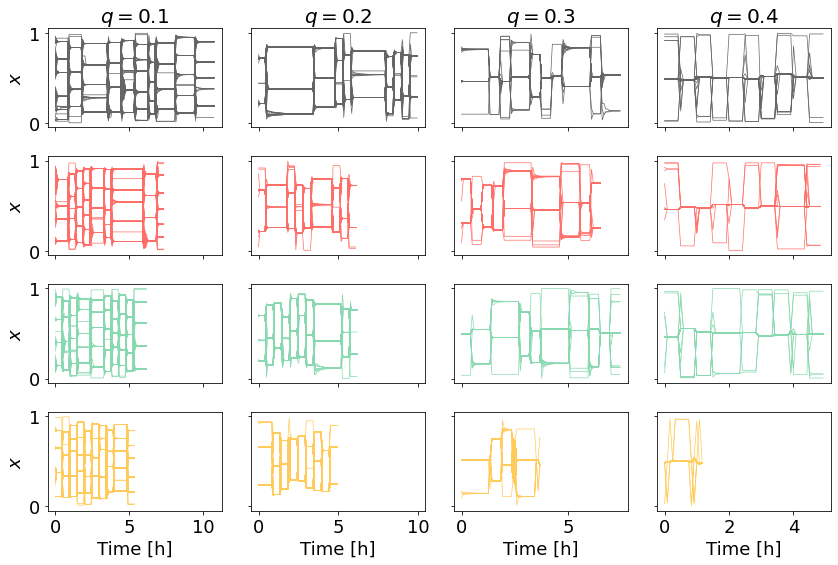

In [9]:
fig, axs = plt.subplots(nrows = 4, ncols = 4,figsize=(12,8.2),sharex='col',sharey=True)
m = 0
for q in q_range:
    for nn in range(4):
        net = nets[nn]
        x_t = obtain_x_t(dataset,net,q)
        #times = np.arange(len(x_t[0]))*5*gap/3600
        times = np.arange(len(x_t[0]))*gap/3600
        for node in range(len(x_t)):
            axs[nn,m].plot(times,x_t[node],c=colors[nn],linewidth=0.7)
        print(net,'len x_t', len(x_t[0]))
        #axs[nn,m].set_xlim([0,150])
    axs[0,m].set_title('$q=%.1f$'%q,fontsize=20)
    m += 1
#axs[.ylabel('x')
axs[3,0].set_xlabel('Time [h]')
axs[3,1].set_xlabel('Time [h]')
axs[3,2].set_xlabel('Time [h]')
axs[3,3].set_xlabel('Time [h]')
axs[0,0].set_ylabel('$x$')
axs[1,0].set_ylabel('$x$')
axs[2,0].set_ylabel('$x$')
axs[3,0].set_ylabel('$x$')


plt.tight_layout()

#plt.savefig('figs/x_t_%s.pdf'%(dataset))
plt.show()
    


In [10]:
x_t[0]

[0.4789581974901463,
 0.49834917218020347,
 0.4923733111989767,
 0.5111013470785774,
 0.5000481393109648,
 0.5000481392849598,
 0.5000481392849598,
 0.5000481392849598,
 0.5000481392849598,
 0.5000481392849598,
 0.48402800386833966,
 0.5391498640055588,
 0.49546007702453854,
 0.46716594983387927,
 0.4845982288447107]

In [11]:
x_t[1]

[0.4789581975135834,
 0.4983491721016032,
 0.49237331167699466,
 0.5111013470754027,
 0.5000481392343525,
 0.5000481392849598,
 0.5000481392849598,
 0.5000481392849598,
 0.5000481392849598,
 0.5000481392849598,
 0.4840280129864597,
 0.5391498639819444,
 0.4954600776987613,
 0.46716600381646445,
 0.48459823017801307]

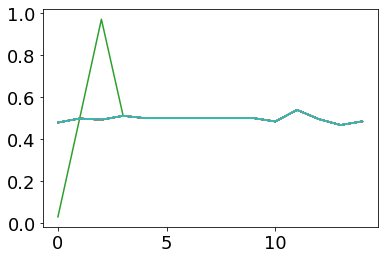

In [12]:
for n in range(20):
    plt.plot(x_t[n])

# Prova fig diversa

In [13]:
def obtain_x_t2(dataset,net,q):
    filename = "results/time_evol_t_save_1/x_t_%s_%s_q_%.2f.csv"%(dataset,net,q)
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        xp = []
        for row in spamreader:
             xp.append([float(i) for i in row])
    return xp

In [14]:
q = 0.1
for i in range(len(nets)):
    net = nets[i]
    print(net)
    globals()['xp_%s'%(net)] = obtain_x_t2(dataset,net,q)

D
EST
ES
E


In [15]:
def plot_histogram(distr_D,distr_E,distr_ES,distr_EST,num_bin):
    
    bin_lims = np.linspace(0,1,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    
    ##computing the histograms
    hist_D, _ = np.histogram(distr_D, bins=bin_lims,density=True)
    hist_E, _ = np.histogram(distr_E, bins=bin_lims,density=True)
    hist_ES, _ = np.histogram(distr_ES, bins=bin_lims,density=True)
    hist_EST, _ = np.histogram(distr_EST, bins=bin_lims,density=True)

    #plot
    ax.plot(bin_centers, hist_D,'-', label='D',color=colors[0])
    ax.plot(bin_centers, hist_EST,'-', label='EST',color=colors[1])
    ax.plot(bin_centers, hist_ES,'-', label='ES',color=colors[2])
    ax.plot(bin_centers, hist_E,'-', label='E',color=colors[3])


In [16]:
def plot_histogram2(distr_t1,distr_t2,distr_t3,num_bin):
    
    bin_lims = np.linspace(0,1,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    
    ##computing the histograms
    hist_t1, _ = np.histogram(distr_t1, bins=bin_lims,density=True)
    hist_t2, _ = np.histogram(distr_t2, bins=bin_lims,density=True)
    hist_t3, _ = np.histogram(distr_t3, bins=bin_lims,density=True)

    #plot
    ax.plot(bin_centers, hist_t1,'-', label='D',color='k')
    ax.plot(bin_centers, hist_t2,'-', label='D',color='grey')
    ax.plot(bin_centers, hist_t3,'-', label='D',color='y')


In [17]:
len(xp_D)#,len(xp_E),len(xp_ES),len(xp_EST)

130

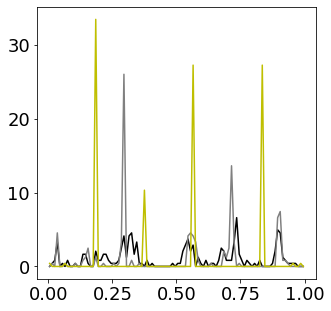

In [18]:
t1,t2,t3 = [0,1,20]
fig, ax = plt.subplots(figsize=(5,5))
plot_histogram2(xp_D[t1],xp_D[t2],xp_D[t3],100)

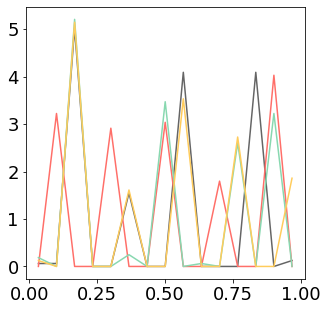

In [19]:
t = 20
fig, ax = plt.subplots(figsize=(5,5))
plot_histogram(xp_D[t],xp_E[t],xp_ES[t],xp_EST[t],15)